
# **Description:**

*This dataset is about **customers** who were contacted for **vehicle insurance**. It contains information about each **person's age, gender, driving license status, previous insurance history, vehicle condition, and how long they have been with the company**. It also shows how much they pay for insurance **(annual premium)**, which sales channel contacted them, and whether they showed interest in buying vehicle insurance.*

 ***The purpose of this dataset is to understand customer behavior and identify which types of people are more likely to respond positively to a vehicle insurance offer.***

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Data Structure Overview.**
1). **id** - **Unique customer ID**

2). **Gender** - **Gender of the customer (Male, Female)**

3). **Age** - **Age of the customer (range: 20–85)**

4). **Driving_License** - **Whether the customer has a driving license (1: Yes, 0: No)**

5). **Region_Code** - **Encoded region value (0 to 52)**

6). **Previously_Insured** - **If the customer had previous insurance (1: Yes, 0: No)**

7). **Vehicle_Age** - **Vehicle age (< 1 Year, 1-2 Year, > 2 Years)**

8). **Vehicle_Damage** - **Whether the vehicle was damaged before (Yes, No)**

9). **Annual_Premium** - **Premium paid by customer (mean: ~30,564, max: 540,165)**

10). **Policy_Sales_Channel -	Encoded sales channel (1 to 163)**

11). **Vintage -	Number of days customer has been associated with the company**

12). **Response	Target variable -  whether the customer is interested in vehicle insurance (1: Yes, 0: No)**


# **Loading the Dataset and Displaying the First 10 Rows.**

In [2]:
df=pd.read_csv('Vehicle_Insurance.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


# **Find Information about the DataFrame.**

In [3]:
# Checking the Shape of the Dataset
df.shape

(381109, 12)

In [4]:
# Display all the column names in the DataFrame ( df )
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [7]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


# Step 1: Data Cleaning and Encoding.

In [8]:
# Encoding categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [9]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [10]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [11]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [12]:
# Selects all columns in the DataFrame df that have numeric data types (like integers or floats).

numeric_columns = df.select_dtypes(include='number').columns

In [13]:
# Selects all columns that have categorical (object/string) data types.

categorical_columns = df.select_dtypes(include='object').columns

In [14]:
print(numeric_columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


### Summary after cleaning

In [15]:
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Finding the IQR (Interquartile Range)

In [16]:
Q1 = df['Annual_Premium'].quantile(0.25)  # 25th percentile
Q3 = df['Annual_Premium'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                             # Interquartile Range

In [17]:
# Defining Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Removing Outliers
df=df[(df['Annual_Premium'] >= lower_bound) & (df['Annual_Premium'] <= upper_bound)]

#  Check Summary Statistics Again

In [19]:
df['Annual_Premium'].describe()

,Annual_Premium
count,370789.000000
mean,29264.643973
std,14743.056656
min,2630.000000
25%,24102.000000
50%,31319.000000
75%,38596.000000
max,61892.000000


### Visualizes the spread and **outliers** of the 'Annual_Premium' values.

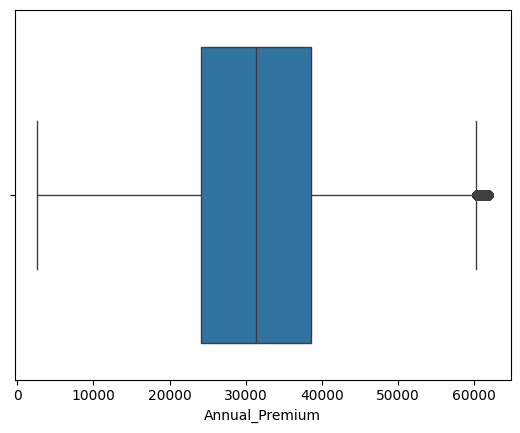

In [20]:
sns.boxplot(x=df['Annual_Premium'])
plt.show()

# It shows how strongly numerical columns are related to each other.

In [21]:
df.corr()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001651,0.001464,-0.000321,-0.000277,0.002768,0.000654,-0.001791,0.002857,-0.002595,-0.000108,-0.001658
Gender,0.001651,1.000000,0.147232,-0.018126,0.001064,-0.082803,0.162184,0.092281,0.001539,-0.112103,-0.002602,0.052305
Age,0.001464,0.147232,1.000000,-0.078650,0.042626,-0.253794,0.766782,0.266429,0.050669,-0.576846,-0.001644,0.110938
Driving_License,-0.000321,-0.018126,-0.078650,1.000000,-0.001195,0.014297,-0.037397,-0.016200,-0.010189,0.043390,-0.000514,0.009630
Region_Code,-0.000277,0.001064,0.042626,-0.001195,1.000000,-0.023736,0.043328,0.027331,-0.002358,-0.043020,-0.002948,0.009474
Previously_Insured,0.002768,-0.082803,-0.253794,0.014297,-0.023736,1.000000,-0.379233,-0.823411,0.014252,0.217038,0.002886,-0.340913
Vehicle_Age,0.000654,0.162184,0.766782,-0.037397,0.043328,-0.379233,1.000000,0.395312,0.024017,-0.548831,-0.002360,0.220587
Vehicle_Damage,-0.001791,0.092281,0.266429,-0.016200,0.027331,-0.823411,0.395312,1.000000,0.000389,-0.221651,-0.002373,0.354096
Annual_Premium,0.002857,0.001539,0.050669,-0.010189,-0.002358,0.014252,0.024017,0.000389,1.000000,-0.107074,-0.000884,0.018566
Policy_Sales_Channel,-0.002595,-0.112103,-0.576846,0.043390,-0.043020,0.217038,-0.548831,-0.221651,-0.107074,1.000000,0.000010,-0.136805


#  Step 2 : Data Visualization: **Distribution of Key Variables**

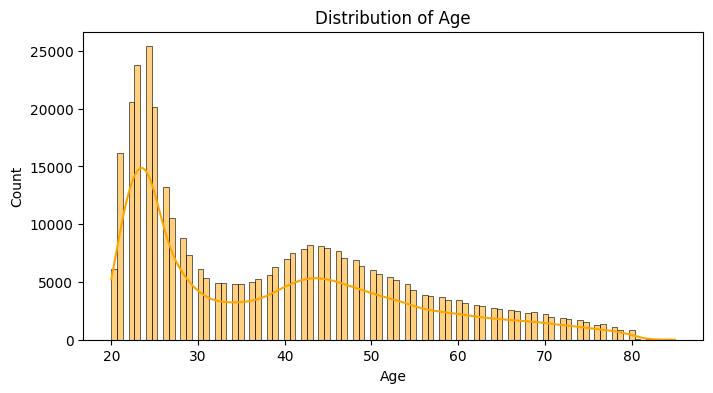

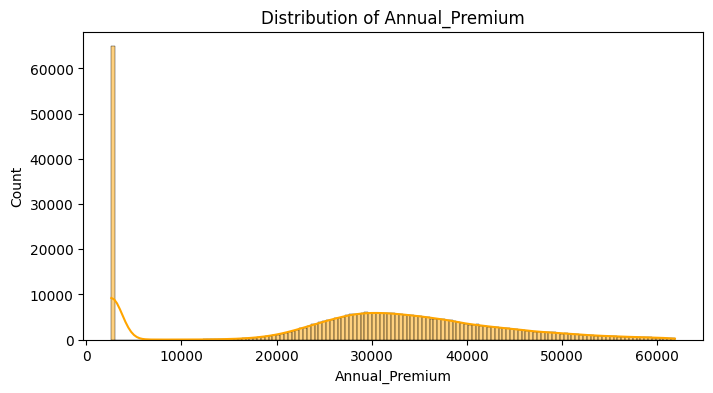

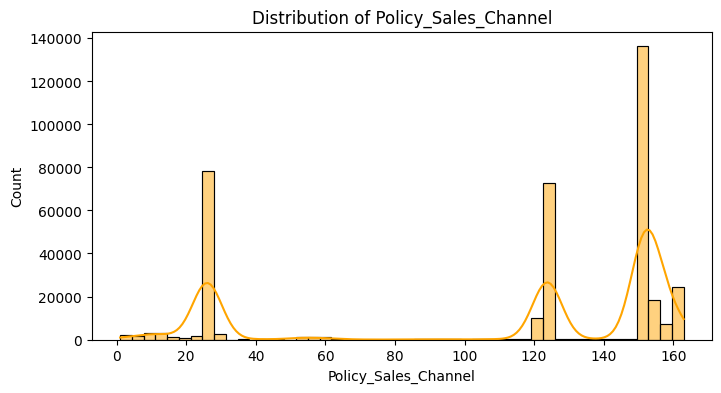

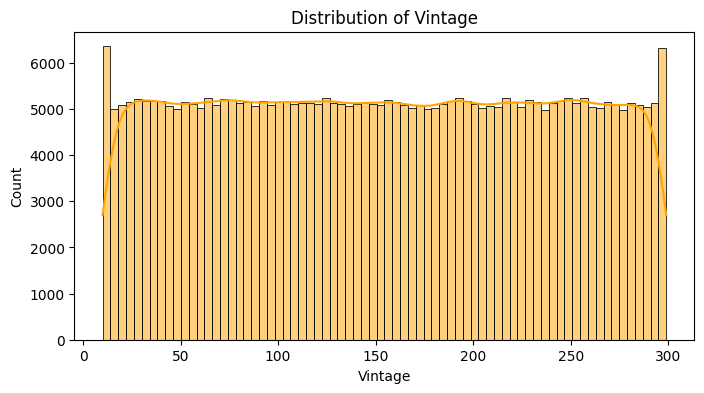

In [22]:
key_columns = ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

for col in key_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True , color='orange')
    plt.title(f'Distribution of {col}')
    plt.show()

# Step 3: Feature Analysis:**Features vs Insurance Claims.**

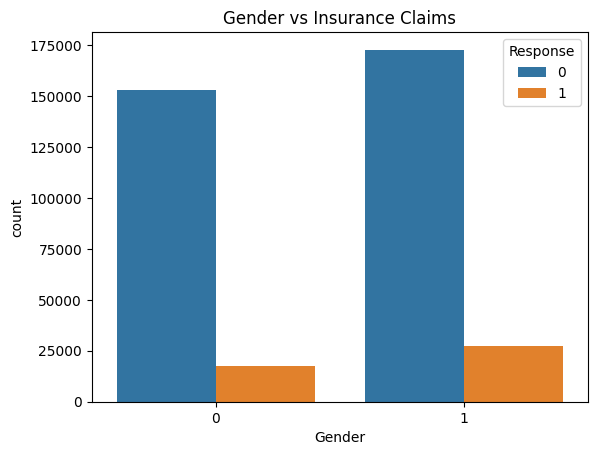

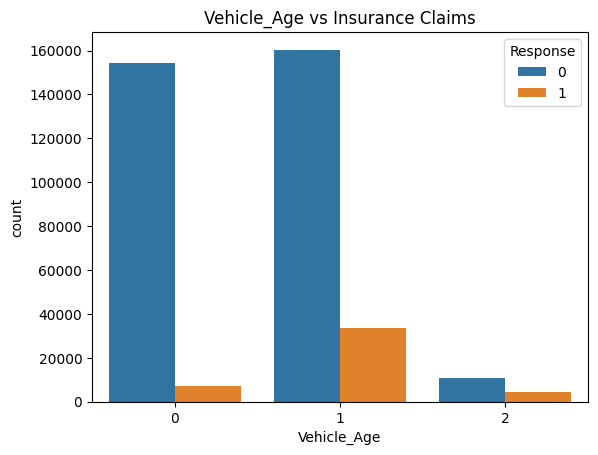

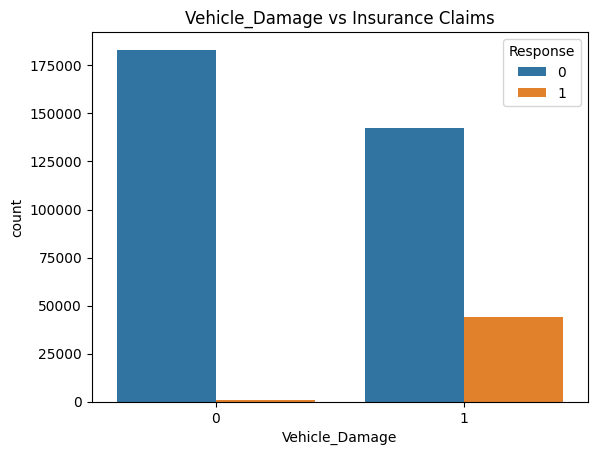

In [23]:
# Categorical vs Target

categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for feature in categorical_features:
    sns.countplot(x=feature, hue='Response', data=df)
    plt.title(f'{feature} vs Insurance Claims')
    plt.show()

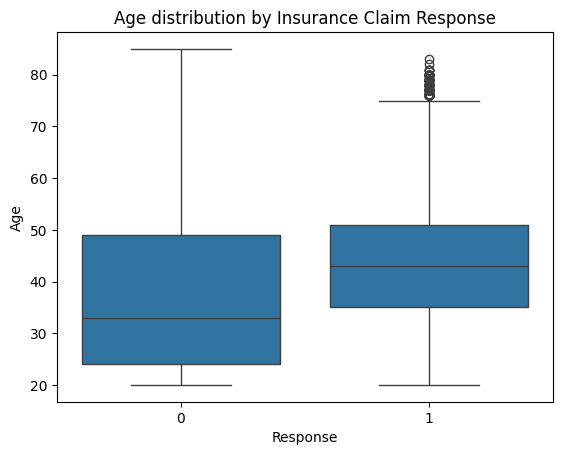

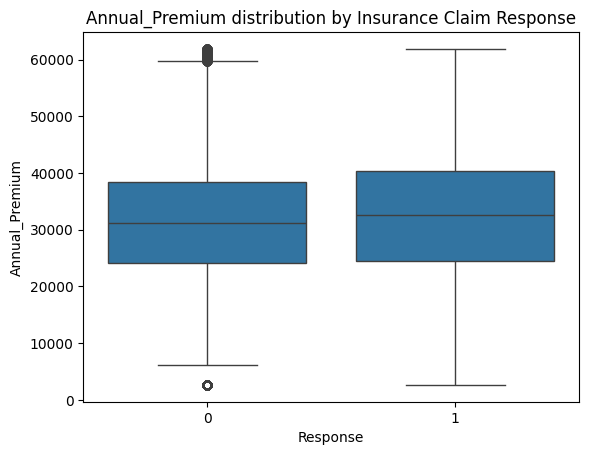

In [24]:
# Numeric vs Target.

numeric_features = ['Age', 'Annual_Premium']

for feature in numeric_features:
    sns.boxplot(x='Response', y=feature, data=df)
    plt.title(f'{feature} distribution by Insurance Claim Response')
    plt.show()

# Step 4: Age Distribution and Claim Impact.

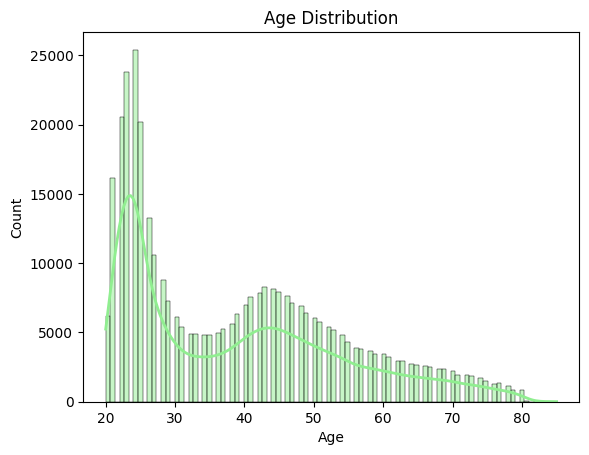

In [25]:
# Age distribution
sns.histplot(df['Age'], kde=True , color='lightgreen' , line_kws={'color': 'green', 'linewidth': 2})
plt.title('Age Distribution')
plt.show()

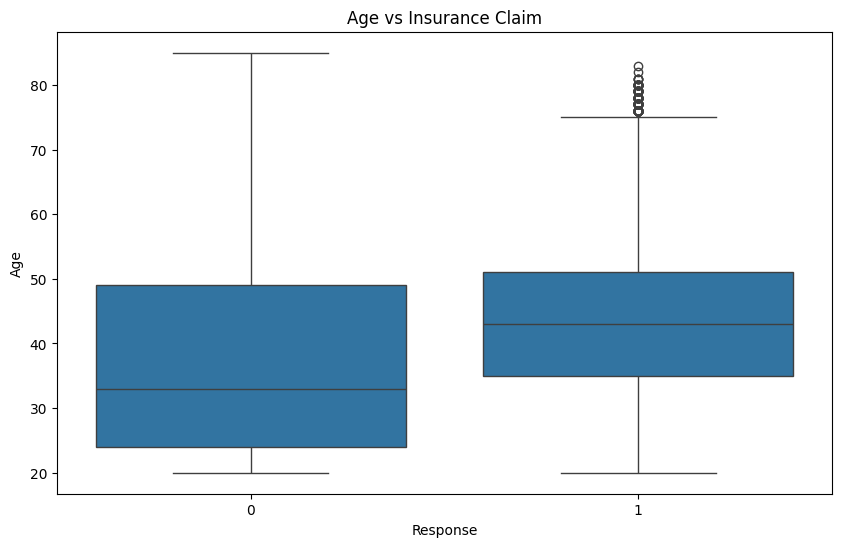

In [26]:
# Age vs Response

plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Insurance Claim')
plt.show()

# Step 5: Premium Analysis: **Premium Distribution and Claims.**

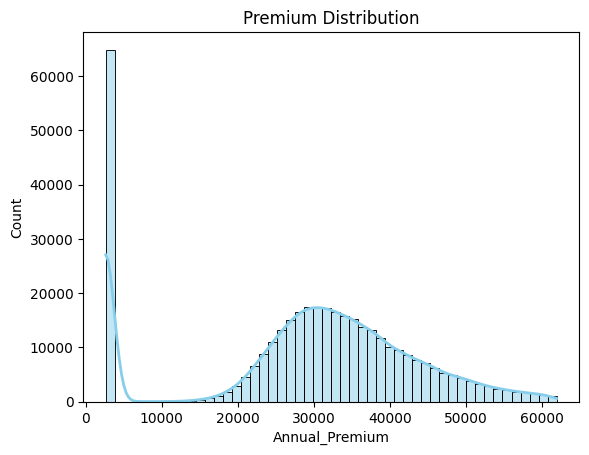

In [27]:
# Distribution of Premiums

sns.histplot(df['Annual_Premium'], bins=50, kde=True , color='skyblue', line_kws={'color': 'red' , 'linewidth': 2})
plt.title('Premium Distribution')
plt.show()

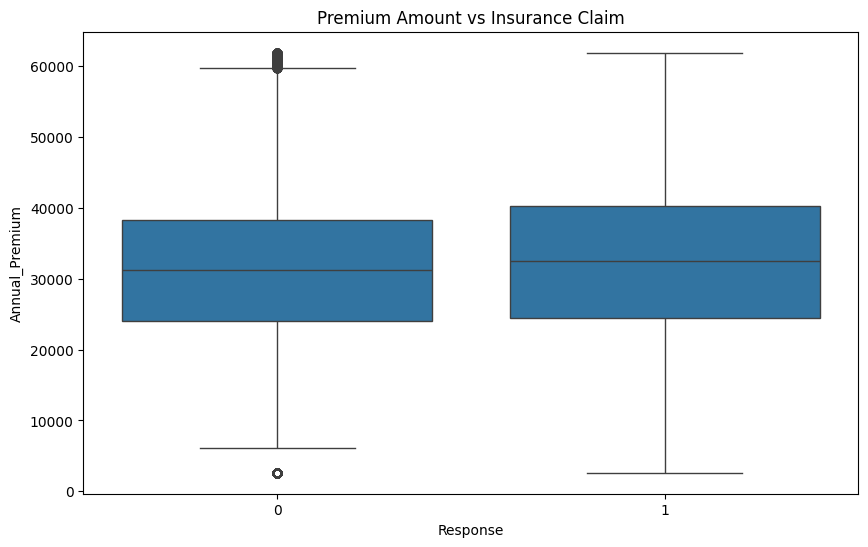

In [28]:
# Premium vs Response

plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Annual_Premium', data=df )
plt.title('Premium Amount vs Insurance Claim')
plt.show()

In [29]:
# Correlation

correlation = df[['Annual_Premium', 'Response']].corr()
correlation

,Annual_Premium,Response
Annual_Premium,1.000000,0.018566
Response,0.018566,1.000000


# Step 6: Claim Frequencies: **factors contributing to higher claim frequencies.**

### Check Overall Claim Frequency

In [30]:
claim_freq = df['Response'].value_counts(normalize=True) * 100

In [31]:
claim_freq

,proportion
Response,
0,87.821915
1,12.178085


### Categorical Features vs Claim Frequency

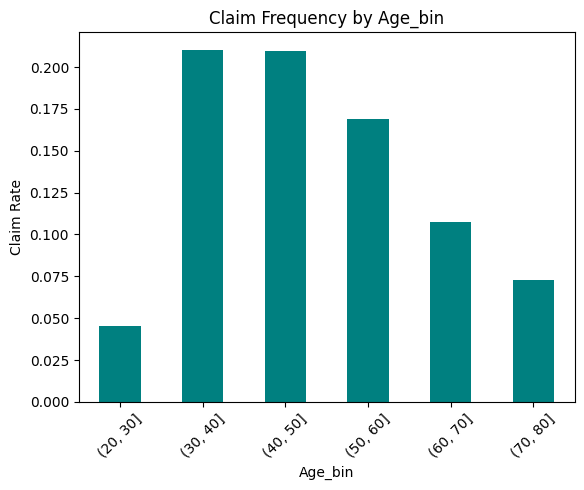

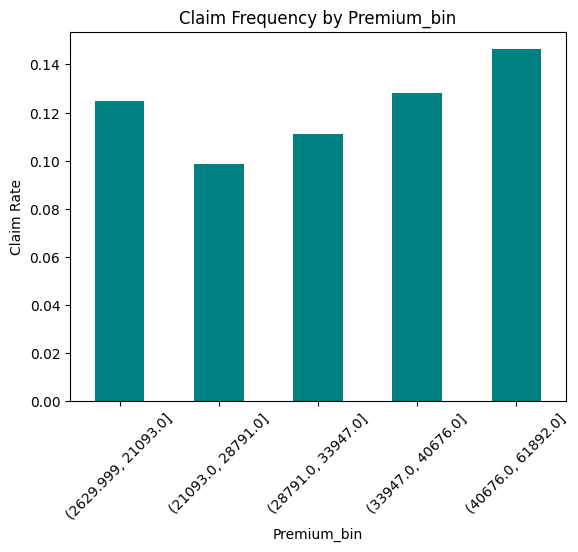

In [32]:
# Using bins to visualize how claim rate changes with age and premium

df['Age_bin'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80])
df['Premium_bin'] = pd.qcut(df['Annual_Premium'], q=5)

for bin_col in ['Age_bin', 'Premium_bin']:
    claim_rate = df.groupby(bin_col)['Response'].mean()
    claim_rate.plot(kind='bar' , color='teal')
    plt.title(f'Claim Frequency by {bin_col}')
    plt.ylabel('Claim Rate')
    plt.xticks(rotation=45)
    plt.show()

###  Categorical Features vs Claim Frequency


Claim Rate by Gender:
 Gender
1    0.137561
0    0.103238
Name: Response, dtype: float64


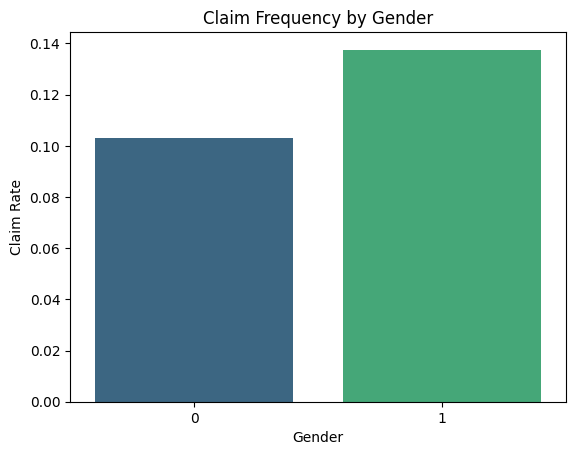


Claim Rate by Vehicle_Age:
 Vehicle_Age
2    0.289421
1    0.173753
0    0.043702
Name: Response, dtype: float64


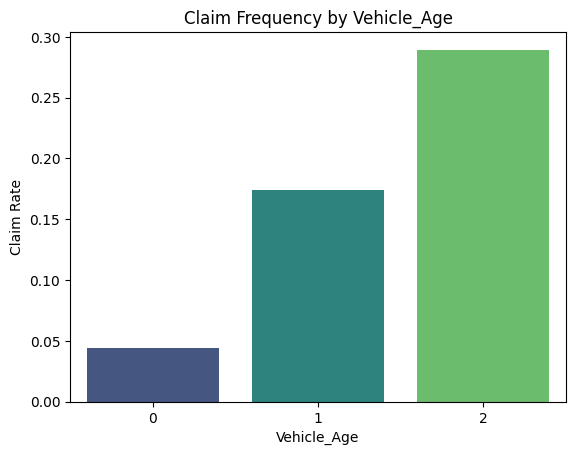


Claim Rate by Vehicle_Damage:
 Vehicle_Damage
1    0.236856
0    0.005249
Name: Response, dtype: float64


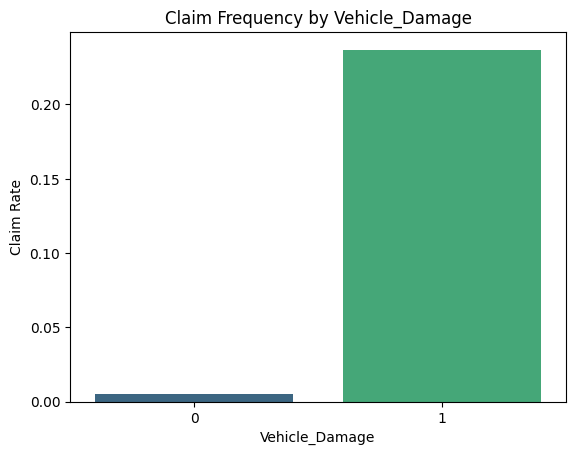

In [33]:
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage',  ]

for feature in categorical_features:
    claim_rate = df.groupby(feature)['Response'].mean().sort_values(ascending=False)
    print(f"\nClaim Rate by {feature}:\n",claim_rate)

    sns.barplot(x=claim_rate.index, y=claim_rate.values , palette='viridis')
    plt.title(f'Claim Frequency by {feature}')
    plt.ylabel('Claim Rate')

    plt.show()


# Step 7: **Vehicle Age and Claims.**

In [34]:
# Check distribution of Vehicle_Age
df['Vehicle_Age'].value_counts()

# Calculate claim rate for each vehicle age group
claim_by_vehicle_age = df.groupby('Vehicle_Age')['Response'].mean().sort_values(ascending=False)
claim_by_vehicle_age


,Response
Vehicle_Age,
2,0.289421
1,0.173753
0,0.043702


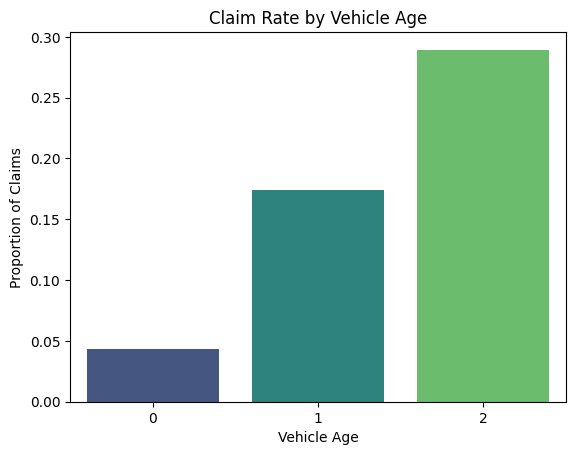

In [35]:
# Visualize Vehicle Age vs Claim Likelihood
sns.barplot(x=claim_by_vehicle_age.index, y=claim_by_vehicle_age.values , palette='viridis')
plt.title('Claim Rate by Vehicle Age')
plt.ylabel('Proportion of Claims')
plt.xlabel('Vehicle Age')
plt.show()

# Step 8: **Region-wise Analysis:**

In [36]:
# Calculate claim rate per region

region_claim_rate = df.groupby('Region_Code')['Response'].mean().sort_values(ascending=False)
region_claim_rate.head(10)

,Response
Region_Code,
38.0,0.192423
28.0,0.187526
19.0,0.162973
4.0,0.157572
23.0,0.152707
51.0,0.149425
24.0,0.141611
7.0,0.132260
18.0,0.130987


### Visualize Claim Frequency Across Regions

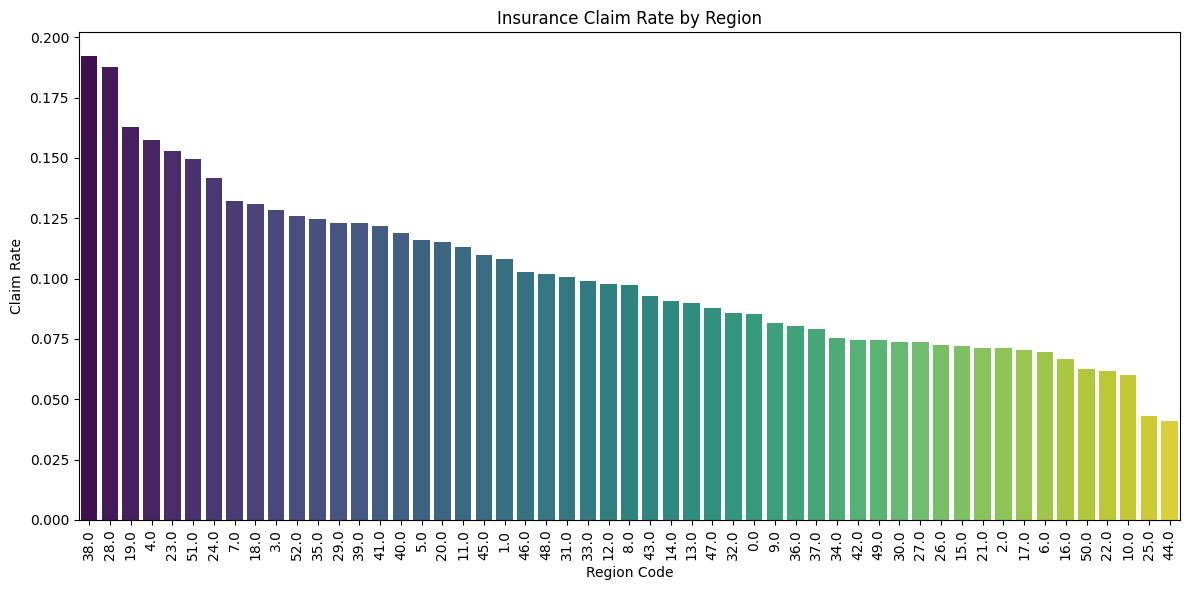

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_claim_rate.index.astype(str), y=region_claim_rate.values , palette='viridis')
plt.title('Insurance Claim Rate by Region')
plt.xlabel('Region Code')
plt.ylabel('Claim Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3. Number of Customers per Region (Contextual Insight)

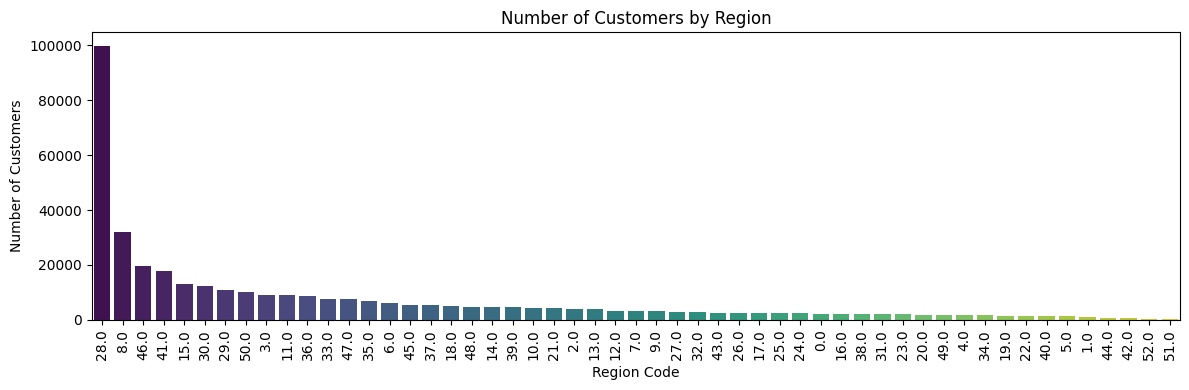

In [38]:
# Plot count of customers per region
region_customer_counts = df['Region_Code'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=region_customer_counts.index.astype(str), y=region_customer_counts.values , palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region Code')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 9: **Policy Analysis:**


### 1. Distribution of Policy Sales Channels

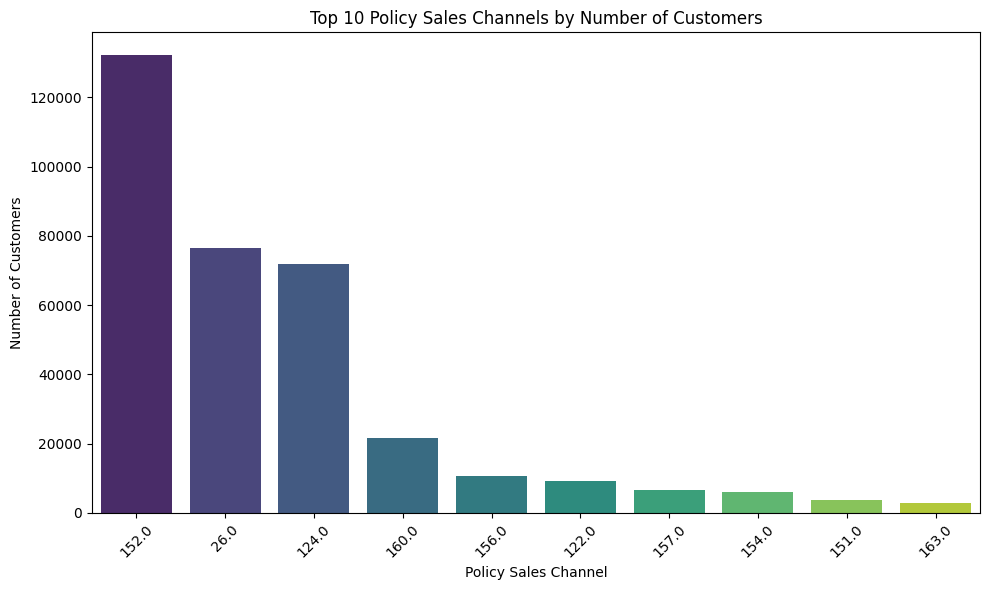

In [39]:
# Top 10 policy sales channels
policy_dist = df['Policy_Sales_Channel'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=policy_dist.index.astype(str), y=policy_dist.values, palette='viridis')
plt.title('Top 10 Policy Sales Channels by Number of Customers')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 10: **Claim Frequency by Vehicle Damage:**

###  Check Value Counts and Claim Rates

In [40]:
# Check number of cases for each Vehicle_Damage category

df['Vehicle_Damage'].value_counts()

,count
Vehicle_Damage,
1,186561
0,184228


In [41]:
# Calculate claim frequency (rate) for each category
claim_by_damage = df.groupby('Vehicle_Damage')['Response'].mean()
claim_by_damage

,Response
Vehicle_Damage,
0,0.005249
1,0.236856


### 2. Visualize Vehicle Damage vs Claim Frequency

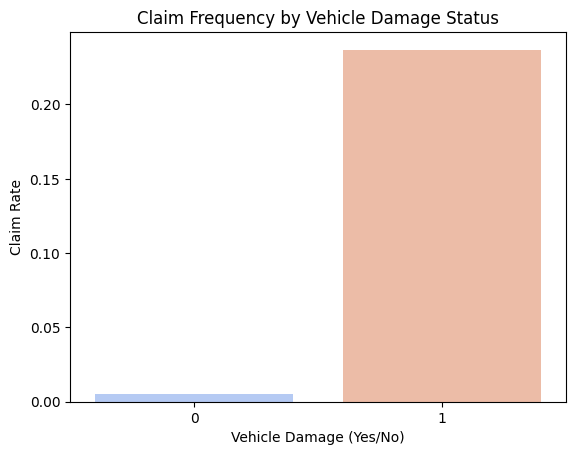

In [42]:
sns.barplot(x=claim_by_damage.index, y=claim_by_damage.values, palette='coolwarm')
plt.title('Claim Frequency by Vehicle Damage Status')
plt.xlabel('Vehicle Damage (Yes/No)')
plt.ylabel('Claim Rate')
plt.show()

# Step 11: **Customer Loyalty:**

### Check Distribution of Customer Loyalty (Vintage)

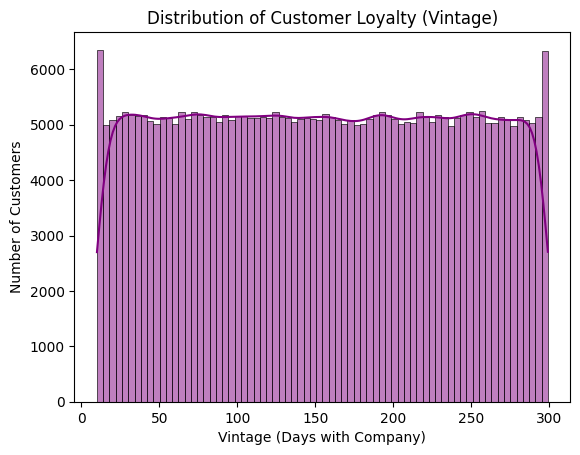

In [43]:
# It shows how many customers fall into different loyalty (vintage) ranges, along with a smooth trend line.
sns.histplot(df['Vintage'], kde=True , color='purple')
plt.title('Distribution of Customer Loyalty (Vintage)')
plt.xlabel('Vintage (Days with Company)')
plt.ylabel('Number of Customers')
plt.show()

# Step 12: **Time Analysis:**


### **It visualizes how claim rates vary based on customer tenure with the company.**

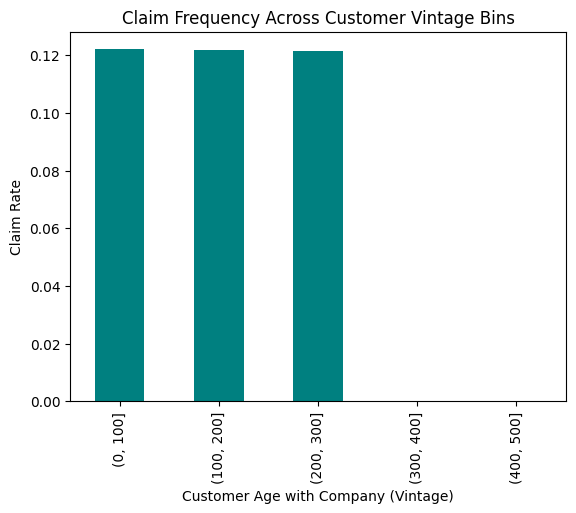

In [44]:
df['Vintage_Bin'] = pd.cut(df['Vintage'], bins=[0, 100, 200, 300, 400, 500])

vintage_claims = df.groupby('Vintage_Bin')['Response'].mean()

vintage_claims.plot(kind='bar', color='teal')
plt.title('Claim Frequency Across Customer Vintage Bins')
plt.xlabel('Customer Age with Company (Vintage)')
plt.ylabel('Claim Rate')
plt.show()